In [1]:
from google.colab import files
files.upload()

Saving Advanced-House-Price-Prediction--master.zip to Advanced-House-Price-Prediction--master.zip


{'Advanced-House-Price-Prediction--master.zip': b'PK\x03\x04\n\x00\x00\x00\x00\x00\xc3SNP\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00(\x00\t\x00Advanced-House-Price-Prediction--master/UT\x05\x00\x01.\xe7F^PK\x03\x04\n\x00\x00\x00\x08\x00\xc3SNPm\xae\xebb-\x0e\r\x00\x81=\x14\x00N\x00\t\x00Advanced-House-Price-Prediction--master/Exploratory Data Analysis Part 1.ipynbUT\x05\x00\x01.\xe7F^\xec\xbdy\x93\xa3J\x92/\xfa\xff\xfd\x14\xb2\x1e\xbb\xd6\xddFw\xb1o\xfdz\xc6\x0c\x84$\x84\x10 \x81\x00\xe9\xceX\x1b\xbb$\xf6]06\xdf\xfd\x05\xca\xac\xcc\xacMY\xa7\xea\x9c{\xa6\xe7=\x99e\n\x11\x1e\x1e\x1e\x1e\x1e\xee?\x0f \xf8\xcf\xff5\xfb\x83\x17$I\xfd\x87\xbf\xcd\xfe\xcf\xff\x9a\xcd\xfe\x13\xfc=\x9d\xf9G3\x14\x018\xfb\x87\xd4\xa9b?\xef\xb3?\xfc\xe5^\x96\x06\x8d\xe3;\x8d\x03\x8a\xfe\xf3\xbf\x9eN\xd5y[y\xc13\x07\xf0\xfb_\xfee\xc6\xb7\x97\xc4\xbfd\xd1l\xebx\xe7K\x16\xcc\xe4\xc0\xa9\xb2\xe9\x84v)\x82\x04\x9c\xa9\xff6\x13\x00\x9b\x19\x979\xc9P_\xea\x99vv\xea\xe0\xdf\x9f\x9b\x99\xfd\xe1\xf5h\x9d\xcd\x9a3 p2\

In [2]:
from zipfile import ZipFile
filename='/content/Advanced-House-Price-Prediction--master.zip'

with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print('Done')

Done


**DATA ANALYSIS**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/Advanced-House-Price-Prediction--master/train.csv')
df.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [5]:
df.shape

(1460, 81)

In [6]:
feature_with_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1]

for feature in feature_with_nan:
  print(feature, np.round(df[feature].isnull().mean(), 4), '% of missing values')

LotFrontage 0.1774 % of missing values
Alley 0.9377 % of missing values
MasVnrType 0.0055 % of missing values
MasVnrArea 0.0055 % of missing values
BsmtQual 0.0253 % of missing values
BsmtCond 0.0253 % of missing values
BsmtExposure 0.026 % of missing values
BsmtFinType1 0.0253 % of missing values
BsmtFinType2 0.026 % of missing values
FireplaceQu 0.4726 % of missing values
GarageType 0.0555 % of missing values
GarageYrBlt 0.0555 % of missing values
GarageFinish 0.0555 % of missing values
GarageQual 0.0555 % of missing values
GarageCond 0.0555 % of missing values
PoolQC 0.9952 % of missing values
Fence 0.8075 % of missing values
MiscFeature 0.963 % of missing values


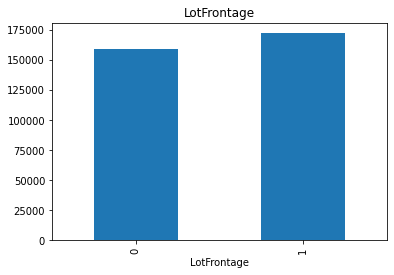

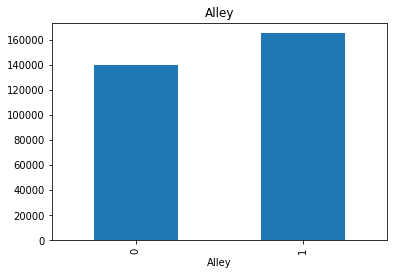

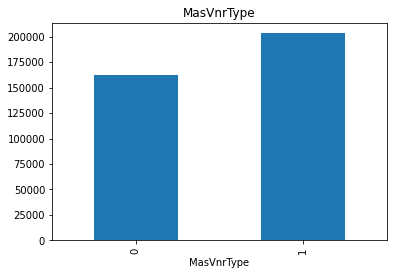

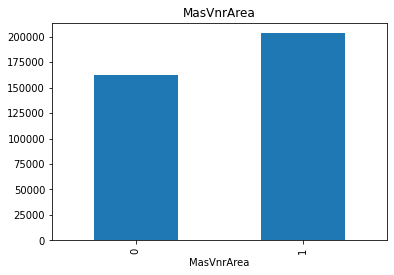

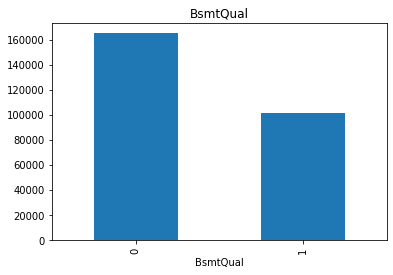

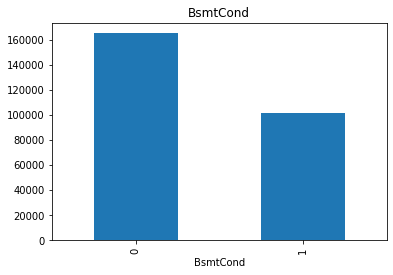

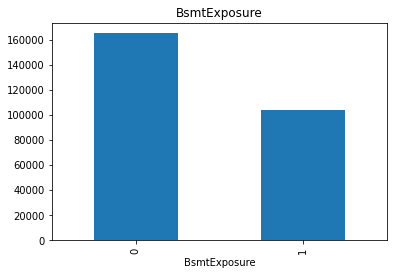

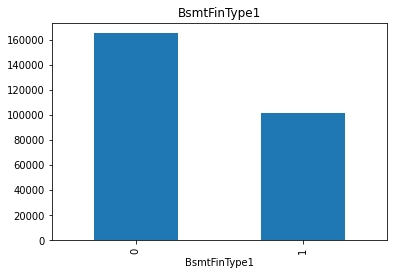

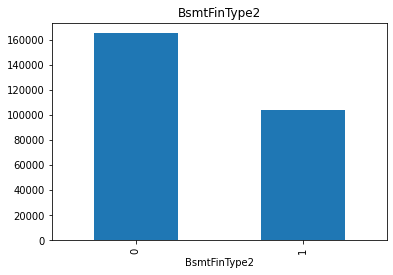

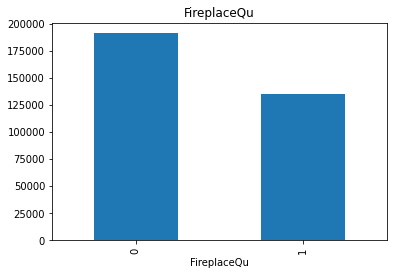

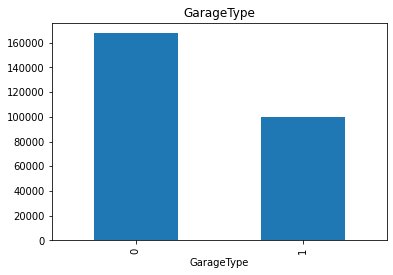

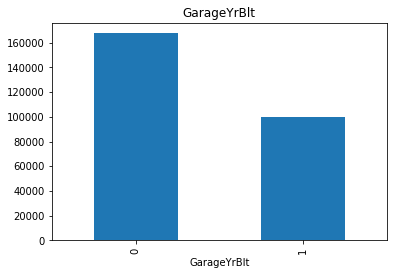

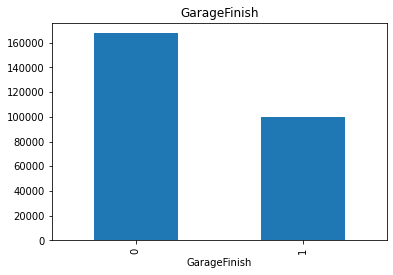

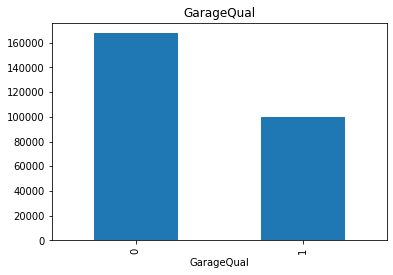

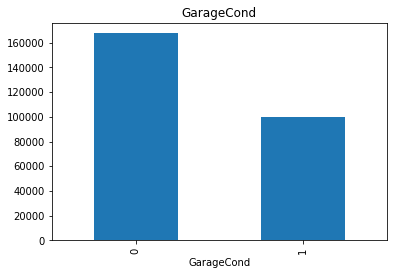

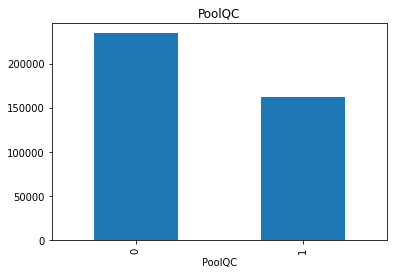

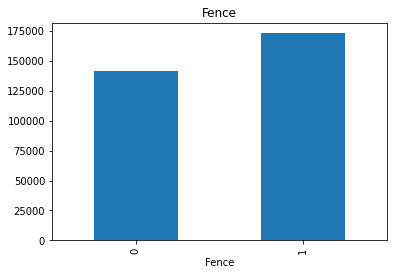

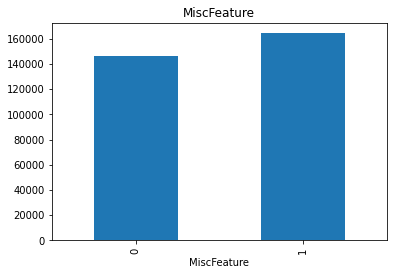

In [7]:
for feature in feature_with_nan:
  data = df.copy()

  data[feature] = np.where(df[feature].isnull(), 1 ,0)

  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.title(feature)
  plt.show()

In [8]:
print('Length od ID = {}'.format(len(df.Id)))

Length od ID = 1460


**NUMERICAL VALUES**

In [9]:
numerical_value = [feature for feature in df.columns if df[feature].dtype != 'O']

print('Length of Numerical Value is {}'.format(len(df[numerical_value])))

df[numerical_value].head()

Length of Numerical Value is 1460


Id  MSSubClass  LotFrontage  LotArea  ...  MiscVal  MoSold  YrSold  SalePrice
0   1          60         65.0     8450  ...        0       2    2008     208500
1   2          20         80.0     9600  ...        0       5    2007     181500
2   3          60         68.0    11250  ...        0       9    2008     223500
3   4          70         60.0     9550  ...        0       2    2006     140000
4   5          60         84.0    14260  ...        0      12    2008     250000

[5 rows x 38 columns]

In [10]:
df[numerical_value].shape

(1460, 38)

**TEMPORAL VARIABLE**

In [11]:
year_variable = [feature for feature in numerical_value if 'Yr' in feature or 'Year' in feature]

year_variable

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [12]:
for feature in year_variable:
  print(feature,':', df[feature].unique())

YearBuilt : [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd : [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt : [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962.

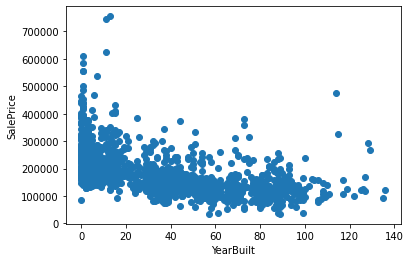

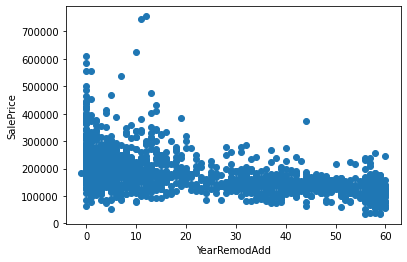

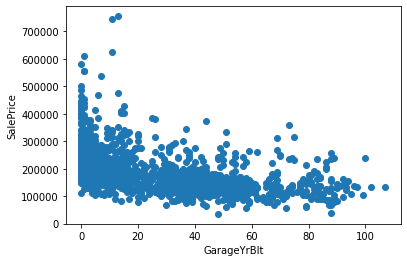

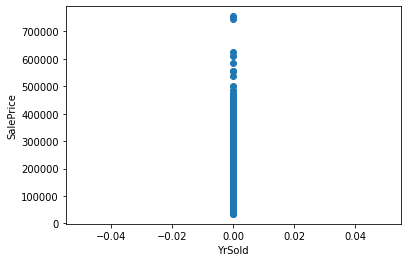

In [13]:
for feature in year_variable:
  data = df.copy()

  data[feature] = data['YrSold']-data[feature]


  plt.scatter(data[feature], data['SalePrice'])
  plt.ylabel('SalePrice')
  plt.xlabel(feature)
  plt.show()

**DISCRETE VARIABLE**

In [14]:
discrete_feature = [feature for feature in numerical_value if len(df[feature].unique())<25 and feature not in year_variable+['Id']]

print('Discrete Variable = {}'.format(len(discrete_feature)))

df[discrete_feature].head()

Discrete Variable = 17


MSSubClass  OverallQual  OverallCond  ...  PoolArea  MiscVal  MoSold
0          60            7            5  ...         0        0       2
1          20            6            8  ...         0        0       5
2          60            7            5  ...         0        0       9
3          70            7            5  ...         0        0       2
4          60            8            5  ...         0        0      12

[5 rows x 17 columns]

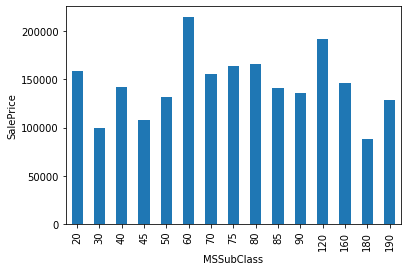

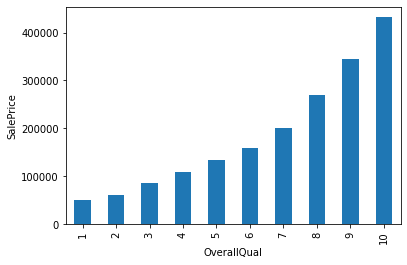

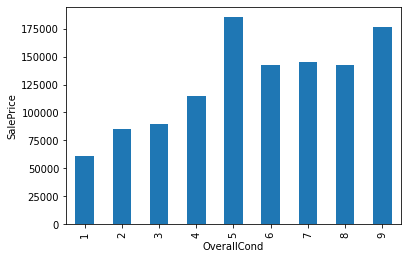

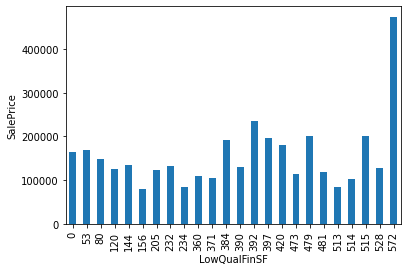

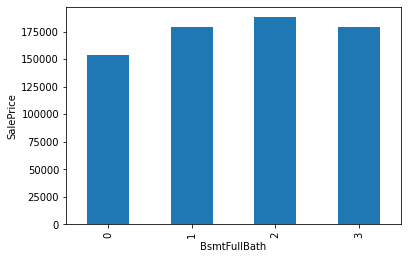

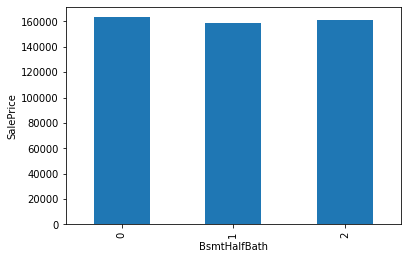

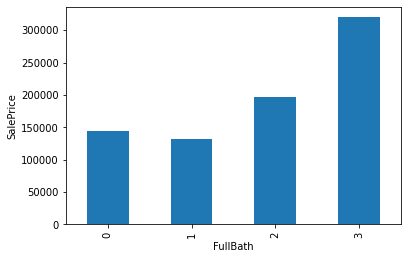

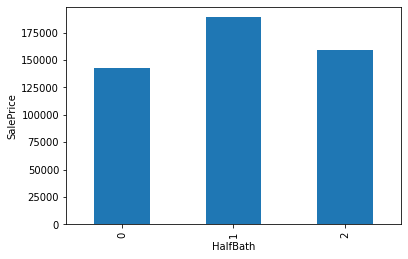

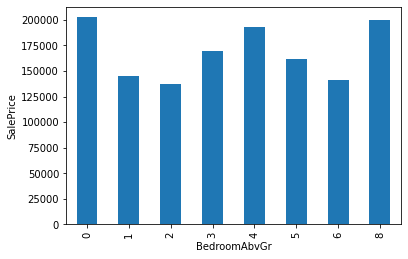

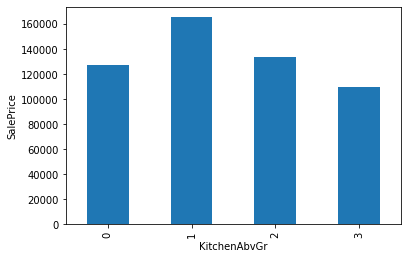

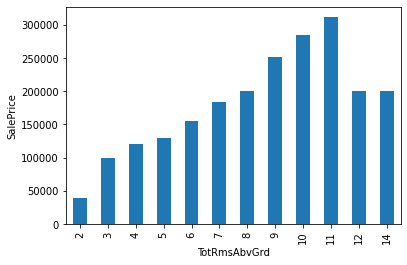

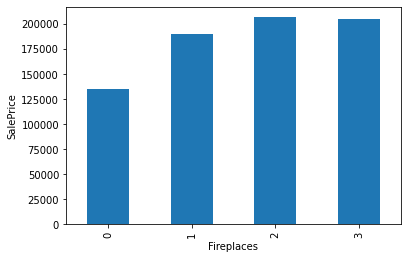

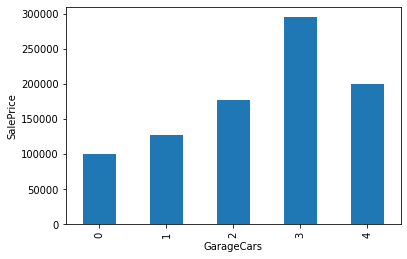

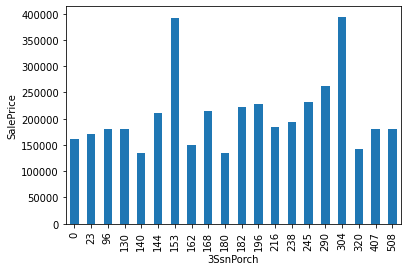

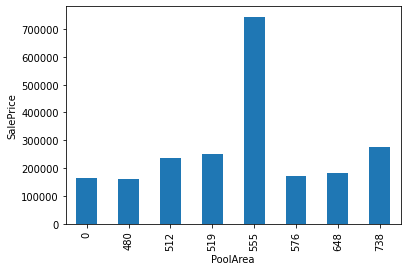

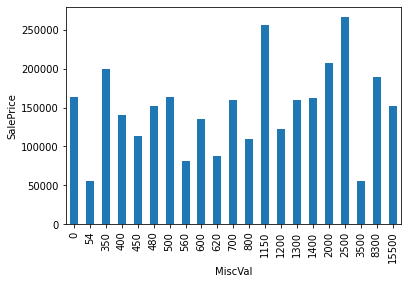

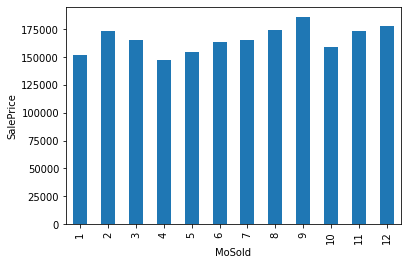

In [15]:
for feature in discrete_feature:
  data = df.copy()

  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.show()

**CONTINOUS FEATURE**

In [16]:
continous_feature = [feature for feature in numerical_value if feature not in discrete_feature+year_variable+['Id']]

print(len(continous_feature))
df[continous_feature].head()

16


LotFrontage  LotArea  MasVnrArea  ...  EnclosedPorch  ScreenPorch  SalePrice
0         65.0     8450       196.0  ...              0            0     208500
1         80.0     9600         0.0  ...              0            0     181500
2         68.0    11250       162.0  ...              0            0     223500
3         60.0     9550         0.0  ...            272            0     140000
4         84.0    14260       350.0  ...              0            0     250000

[5 rows x 16 columns]

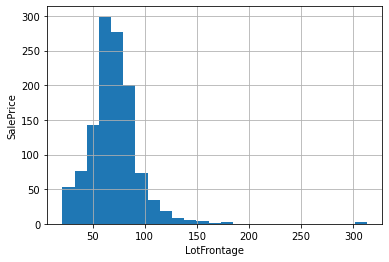

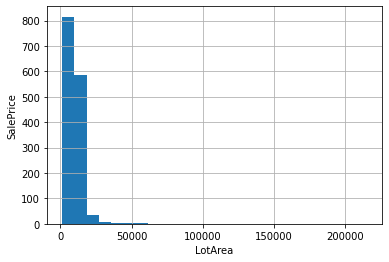

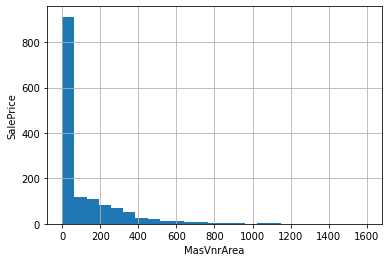

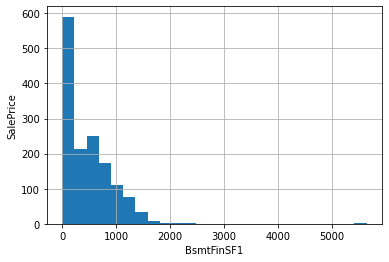

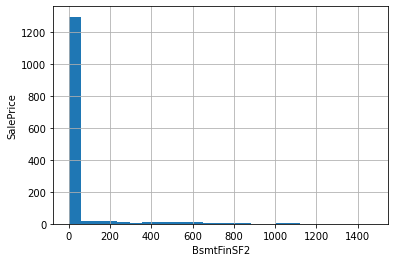

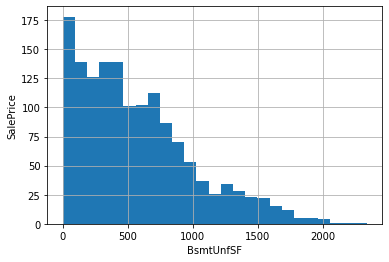

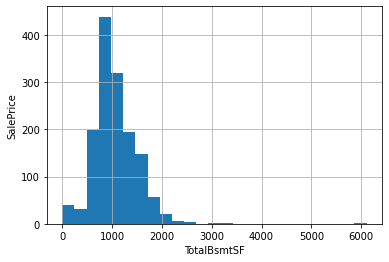

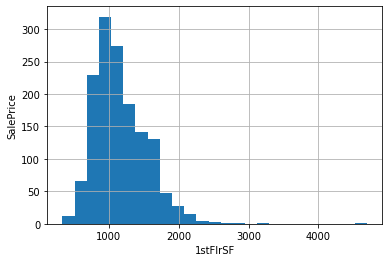

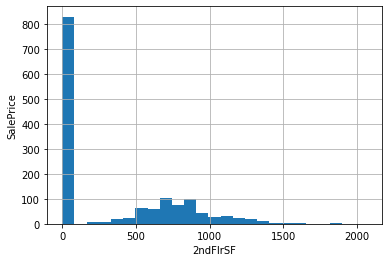

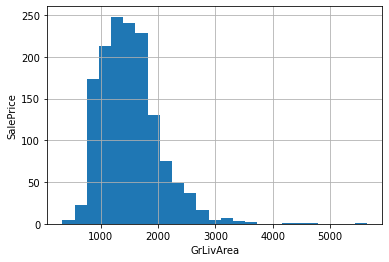

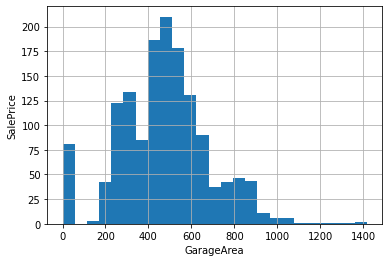

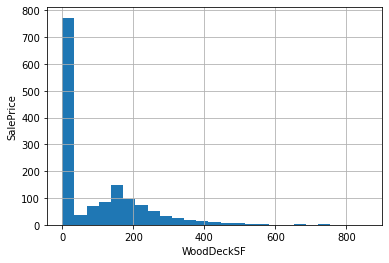

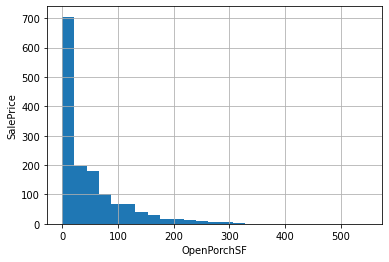

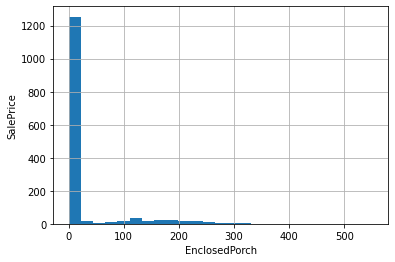

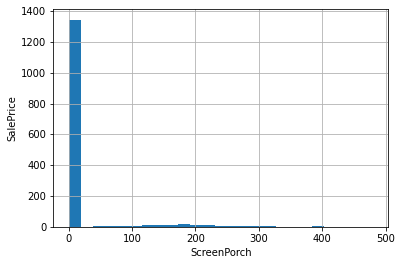

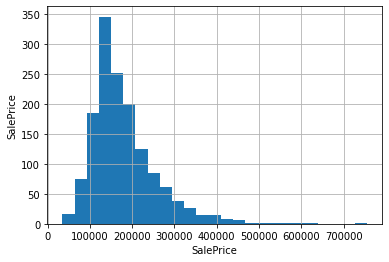

In [17]:
for feature in continous_feature:
  data = df.copy()

  data[feature].hist(bins=25)
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.show()

**Normal Distribution**

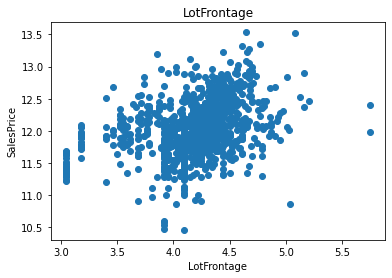

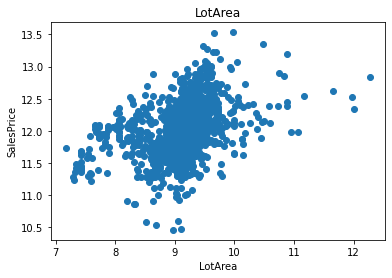

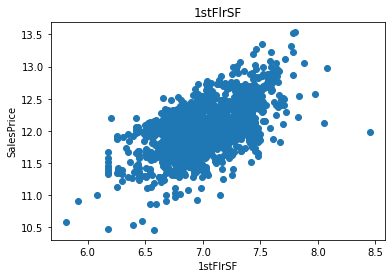

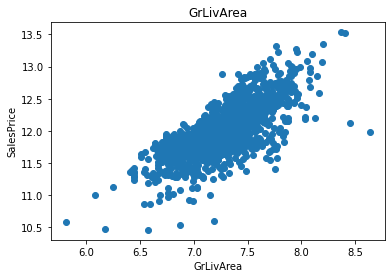

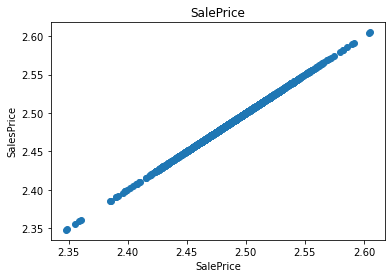

In [18]:
for feature in continous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

**OUTLIERS**

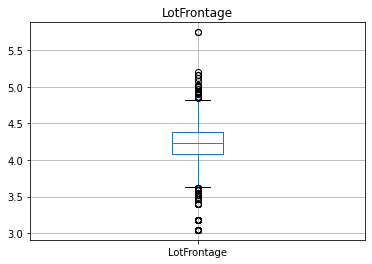

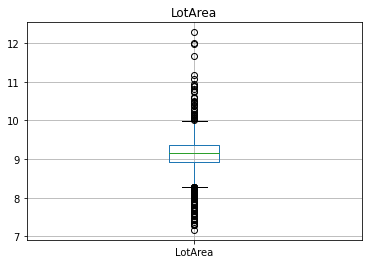

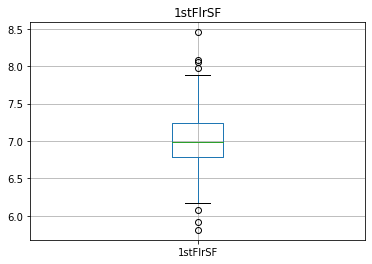

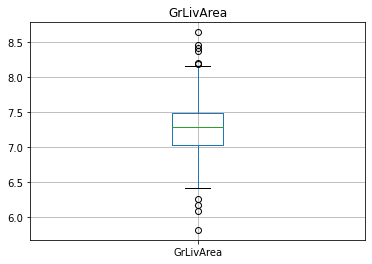

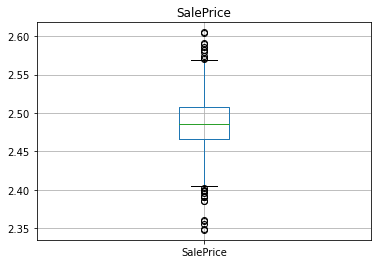

In [19]:
for feature in continous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
      data[feature]=np.log(data[feature])
      data['SalePrice']=np.log(data['SalePrice'])
      data.boxplot(column=feature)
      plt.title(feature)
      plt.show()

In [20]:
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

print(len(categorical_feature))
df[categorical_feature].head()

43


MSZoning Street Alley LotShape  ... Fence MiscFeature SaleType SaleCondition
0       RL   Pave   NaN      Reg  ...   NaN         NaN       WD        Normal
1       RL   Pave   NaN      Reg  ...   NaN         NaN       WD        Normal
2       RL   Pave   NaN      IR1  ...   NaN         NaN       WD        Normal
3       RL   Pave   NaN      IR1  ...   NaN         NaN       WD       Abnorml
4       RL   Pave   NaN      IR1  ...   NaN         NaN       WD        Normal

[5 rows x 43 columns]

In [21]:
for feature in categorical_feature:
  print("The {} has {} categotical variable".format(feature, len(df[feature].unique())))

The MSZoning has 5 categotical variable
The Street has 2 categotical variable
The Alley has 3 categotical variable
The LotShape has 4 categotical variable
The LandContour has 4 categotical variable
The Utilities has 2 categotical variable
The LotConfig has 5 categotical variable
The LandSlope has 3 categotical variable
The Neighborhood has 25 categotical variable
The Condition1 has 9 categotical variable
The Condition2 has 8 categotical variable
The BldgType has 5 categotical variable
The HouseStyle has 8 categotical variable
The RoofStyle has 6 categotical variable
The RoofMatl has 8 categotical variable
The Exterior1st has 15 categotical variable
The Exterior2nd has 16 categotical variable
The MasVnrType has 5 categotical variable
The ExterQual has 4 categotical variable
The ExterCond has 5 categotical variable
The Foundation has 6 categotical variable
The BsmtQual has 5 categotical variable
The BsmtCond has 5 categotical variable
The BsmtExposure has 5 categotical variable
The BsmtF

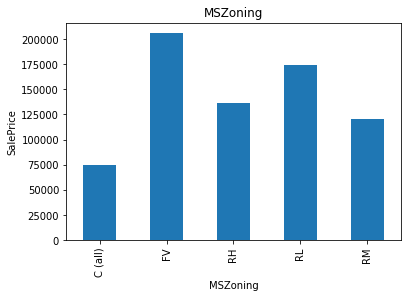

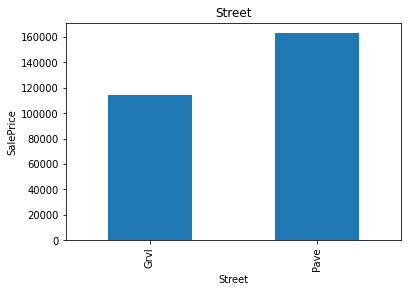

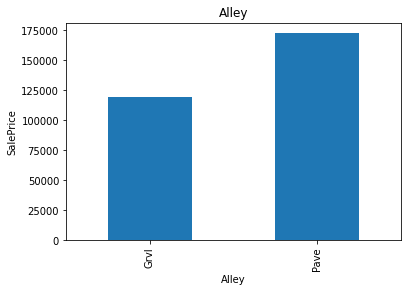

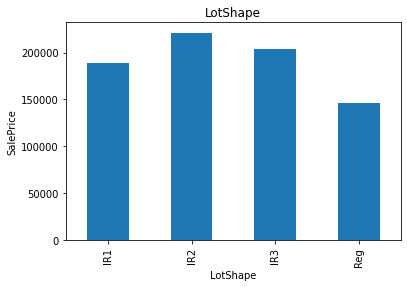

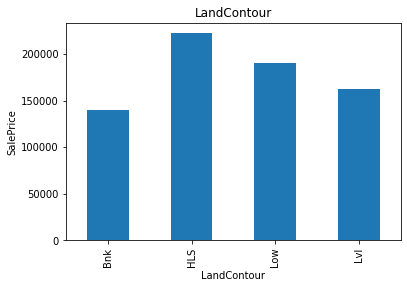

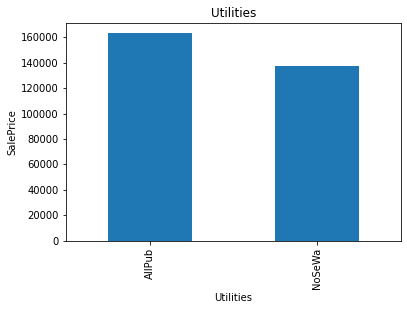

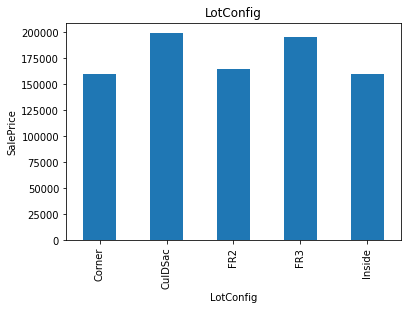

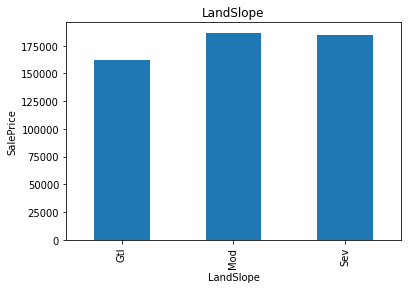

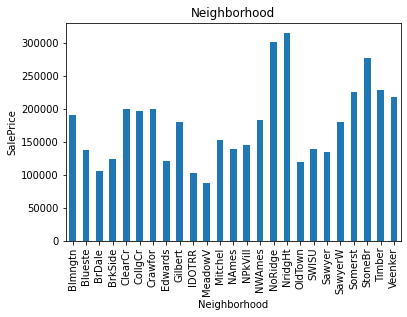

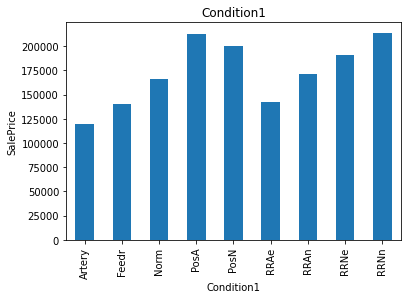

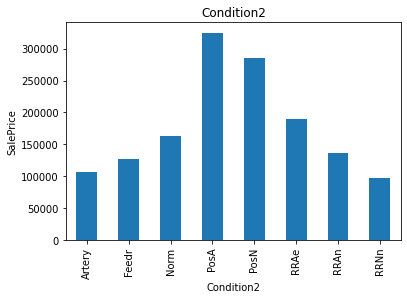

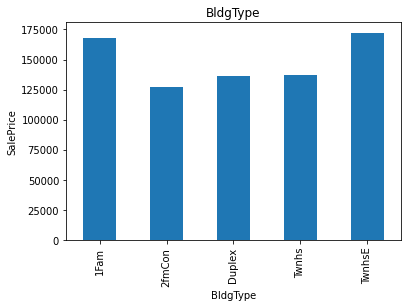

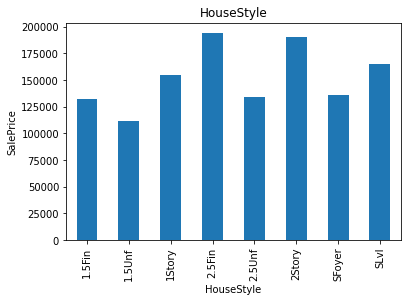

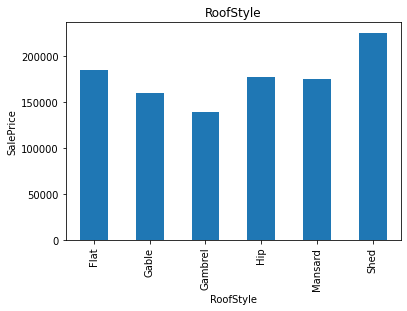

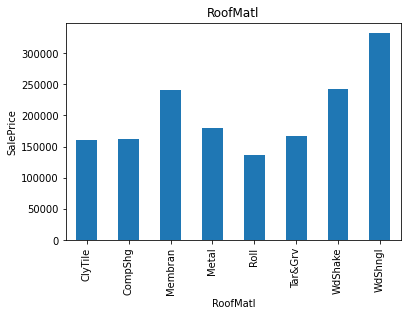

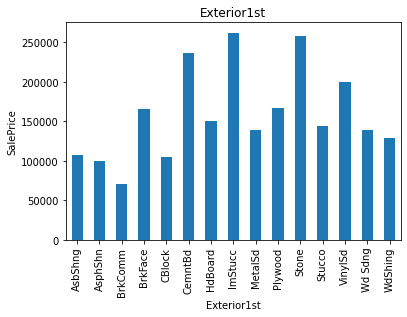

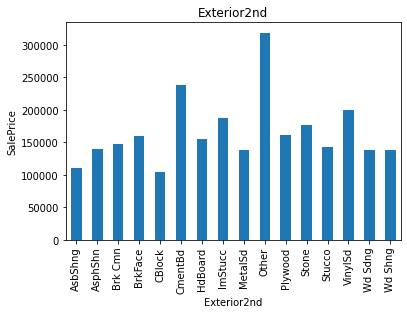

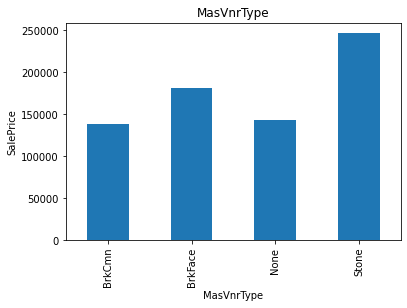

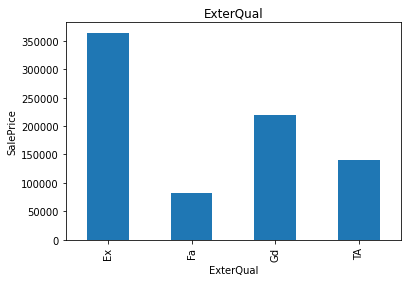

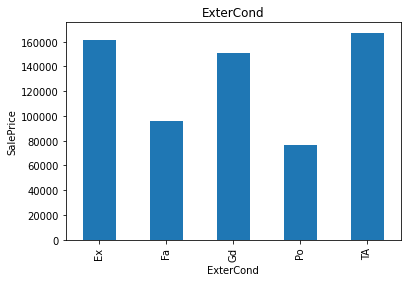

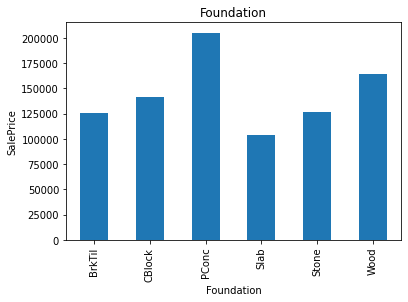

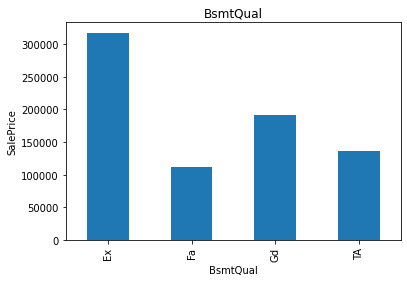

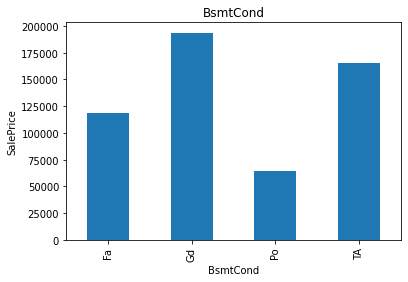

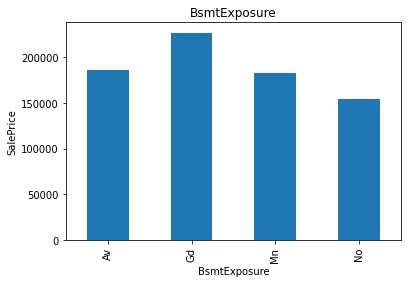

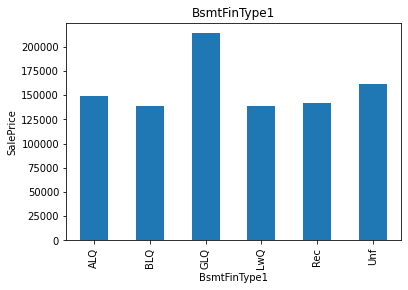

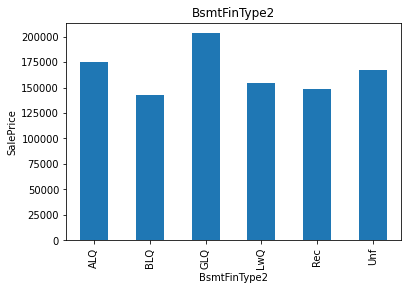

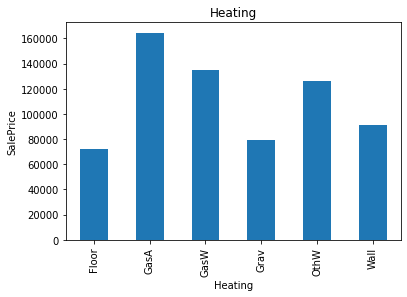

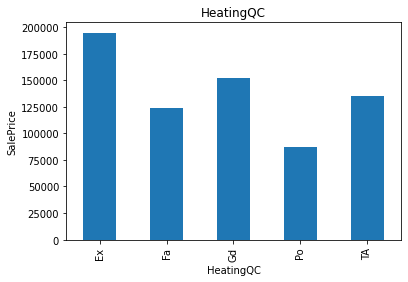

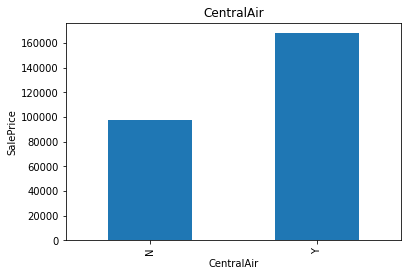

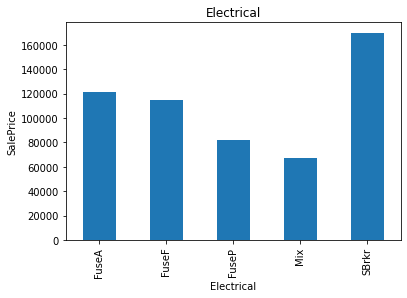

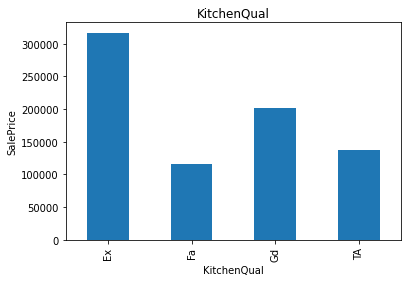

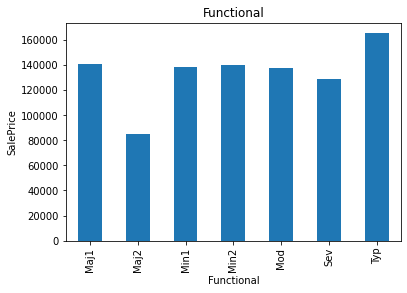

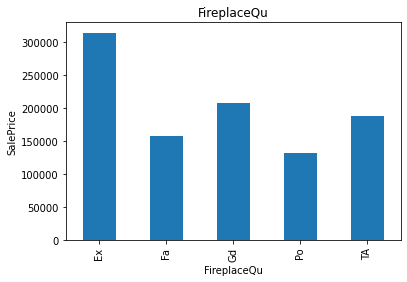

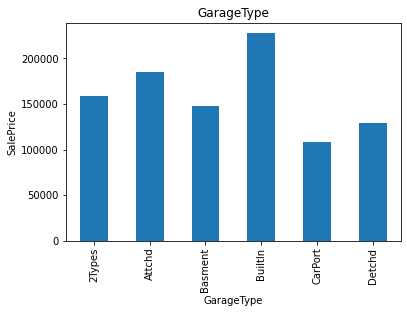

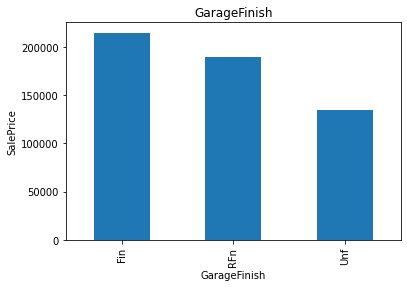

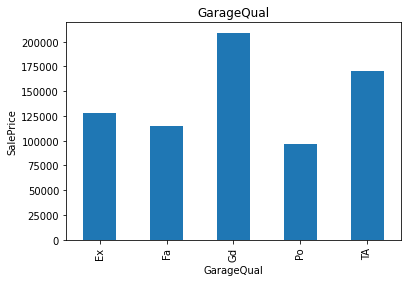

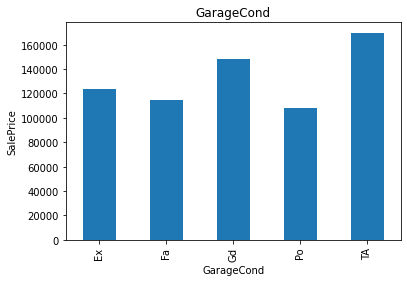

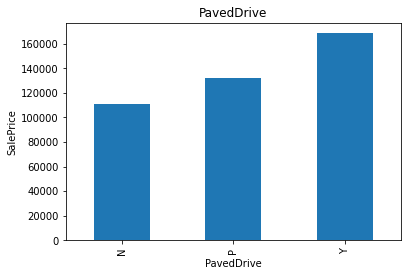

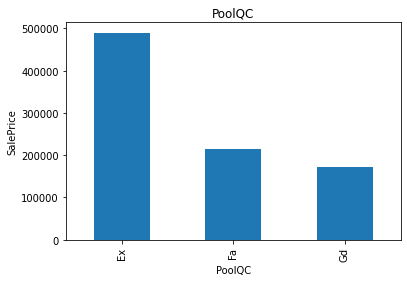

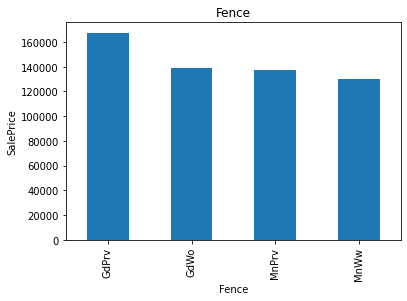

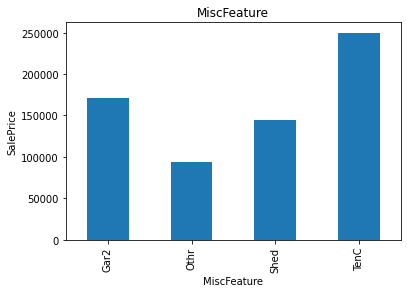

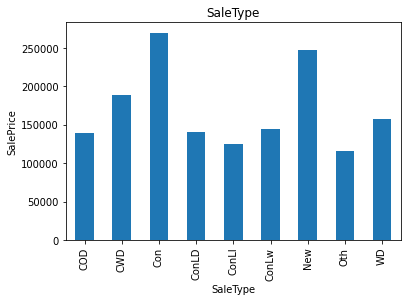

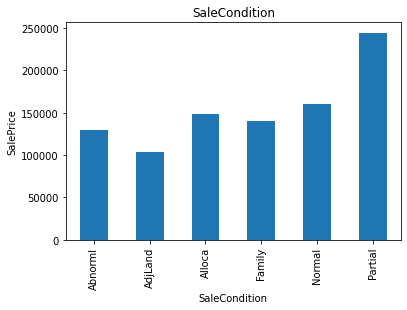

In [22]:
for feature in categorical_feature:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

**Feature Engineering**

In [23]:
df = pd.read_csv('/content/Advanced-House-Price-Prediction--master/train.csv')

In [24]:
df.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df['SalePrice'], test_size=0.1, random_state=0)

In [26]:
X_train.shape

(1314, 81)

In [27]:
X_test.shape

(146, 81)

In [28]:
feature_nan = [feature for feature in df.columns if df[feature].dtype == 'O' and df[feature].isnull().sum()>1]
feature_nan

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [29]:
def replace_cat_feature(df, feature_nan):
  data=df.copy()
  data[feature_nan] = data[feature_nan].fillna('Missing')
  return data

In [30]:
df = replace_cat_feature(df, feature_nan)
df[feature_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [31]:
df.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [32]:
numerical_value = [feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtype != 'O']

for feature in numerical_value:
  print(feature, 'has', np.round(df[feature].isnull()).mean(), '% missing nan')

LotFrontage has 0.1774 % missing nan
MasVnrArea has 0.005478 % missing nan
GarageYrBlt has 0.05548 % missing nan


In [33]:
for feature in numerical_value:
  median_val = df[feature].median()
  df[feature+'nan'] = np.where(df[feature].isnull(), 1, 0)
  df[feature].fillna(median_val, inplace=True) 

In [34]:
df[numerical_value].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [35]:
df.head(40)

Id  MSSubClass MSZoning  ...  LotFrontagenan  MasVnrAreanan GarageYrBltnan
0    1          60       RL  ...               0              0              0
1    2          20       RL  ...               0              0              0
2    3          60       RL  ...               0              0              0
3    4          70       RL  ...               0              0              0
4    5          60       RL  ...               0              0              0
5    6          50       RL  ...               0              0              0
6    7          20       RL  ...               0              0              0
7    8          60       RL  ...               1              0              0
8    9          50       RM  ...               0              0              0
9   10         190       RL  ...               0              0              0
10  11          20       RL  ...               0              0              0
11  12          60       RL  ...               0              0              0
12  13          20       RL  ...               1              0              0
13  14          20       RL  ...               0              0              0
14  15          20       RL  ...               1              0              0
15  16          45       RM  ...               0              0              0
16  17          20       RL  ...               1              0              0
17  18          90       RL  ...               0              0              0
18  19          20       RL  ...               0              0              0
19  20          20       RL  ...               0              0              0
20  21          60       RL  ...               0              0              0
21  22          45       RM  ...               0              0              0
22  23          20       RL  ...               0              0              0
23  24         120       RM  ...               0              0              0
24  25          20       RL  ...               1              0              0
25  26          20       RL  ...               0              0              0
26  27          20       RL  ...               0              0              0
27  28          20       RL  ...               0              0              0
28  29          20       RL  ...               0              0              0
29  30          30       RM  ...               0              0              0
30  31          70  C (all)  ...               0              0              0
31  32          20       RL  ...               1              0              0
32  33          20       RL  ...               0              0              0
33  34          20       RL  ...               0              0              0
34  35         120       RL  ...               0              0              0
35  36          60       RL  ...               0              0              0
36  37          20       RL  ...               0              0              0
37  38          20       RL  ...               0              0              0
38  39          20       RL  ...               0              0              0
39  40          90       RL  ...               0              0              1

[40 rows x 84 columns]

In [36]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:     
  df[feature]=df['YrSold']-df[feature]

In [37]:
df.head()

Id  MSSubClass MSZoning  ...  LotFrontagenan  MasVnrAreanan GarageYrBltnan
0   1          60       RL  ...               0              0              0
1   2          20       RL  ...               0              0              0
2   3          60       RL  ...               0              0              0
3   4          70       RL  ...               0              0              0
4   5          60       RL  ...               0              0              0

[5 rows x 84 columns]

In [38]:
df[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0          5             5          5.0
1         31            31         31.0
2          7             6          7.0
3         91            36          8.0
4          8             8          8.0

In [39]:
for feature in ['GarageYrBlt']:     
  df[feature]=df['YrSold']-df[feature]

In [40]:
df[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0          5             5       2003.0
1         31            31       1976.0
2          7             6       2001.0
3         91            36       1998.0
4          8             8       2000.0

**Numerical Values**

In [41]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    df[feature]=np.log(df[feature])

In [42]:
df.head()

Id  MSSubClass MSZoning  ...  LotFrontagenan  MasVnrAreanan GarageYrBltnan
0   1          60       RL  ...               0              0              0
1   2          20       RL  ...               0              0              0
2   3          60       RL  ...               0              0              0
3   4          70       RL  ...               0              0              0
4   5          60       RL  ...               0              0              0

[5 rows x 84 columns]

**Handling Rare Categorical Feature**

In [43]:
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
cat_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [44]:
for feature in cat_feature:
  temp =  df.groupby(feature)['SalePrice'].count()/len(df)
  temp_df = temp[temp>0.01].index
  df[feature] = np.where(df[feature].isin(temp_df), df[feature], 'Rare_val')

In [45]:
df.head(50)

Id  MSSubClass  MSZoning  ...  LotFrontagenan  MasVnrAreanan GarageYrBltnan
0    1          60        RL  ...               0              0              0
1    2          20        RL  ...               0              0              0
2    3          60        RL  ...               0              0              0
3    4          70        RL  ...               0              0              0
4    5          60        RL  ...               0              0              0
5    6          50        RL  ...               0              0              0
6    7          20        RL  ...               0              0              0
7    8          60        RL  ...               1              0              0
8    9          50        RM  ...               0              0              0
9   10         190        RL  ...               0              0              0
10  11          20        RL  ...               0              0              0
11  12          60        RL  ...               0              0              0
12  13          20        RL  ...               1              0              0
13  14          20        RL  ...               0              0              0
14  15          20        RL  ...               1              0              0
15  16          45        RM  ...               0              0              0
16  17          20        RL  ...               1              0              0
17  18          90        RL  ...               0              0              0
18  19          20        RL  ...               0              0              0
19  20          20        RL  ...               0              0              0
20  21          60        RL  ...               0              0              0
21  22          45        RM  ...               0              0              0
22  23          20        RL  ...               0              0              0
23  24         120        RM  ...               0              0              0
24  25          20        RL  ...               1              0              0
25  26          20        RL  ...               0              0              0
26  27          20        RL  ...               0              0              0
27  28          20        RL  ...               0              0              0
28  29          20        RL  ...               0              0              0
29  30          30        RM  ...               0              0              0
30  31          70  Rare_val  ...               0              0              0
31  32          20        RL  ...               1              0              0
32  33          20        RL  ...               0              0              0
33  34          20        RL  ...               0              0              0
34  35         120        RL  ...               0              0              0
35  36          60        RL  ...               0              0              0
36  37          20        RL  ...               0              0              0
37  38          20        RL  ...               0              0              0
38  39          20        RL  ...               0              0              0
39  40          90        RL  ...               0              0              1
40  41          20        RL  ...               0              0              0
41  42          20        RL  ...               0              0              0
42  43          85        RL  ...               1              0              0
43  44          20        RL  ...               1              0              0
44  45          20        RL  ...               0              0              0
45  46         120        RL  ...               0              0              0
46  47          50        RL  ...               0              0              0
47  48          20        FV  ...               0              0              0
48  49         190        RM  ...               0              0              1
49  

**Feature Scaling**

In [46]:
for feature in cat_feature:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [47]:
df.head()

Id  MSSubClass  MSZoning  ...  LotFrontagenan  MasVnrAreanan  GarageYrBltnan
0   1          60         3  ...               0              0               0
1   2          20         3  ...               0              0               0
2   3          60         3  ...               0              0               0
3   4          70         3  ...               0              0               0
4   5          60         3  ...               0              0               0

[5 rows x 84 columns]

In [48]:
feature_scale = [feature for feature in df.columns if feature not in ['Id', 'SalePrice']]

In [49]:
feature_scale

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [52]:
data = pd.concat([df[['Id', 'SalePrice']].reset_index(drop=True),
                 pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)], axis=1)

In [53]:
data.head()

Id  SalePrice  MSSubClass  ...  LotFrontagenan  MasVnrAreanan  GarageYrBltnan
0   1  12.247694    0.235294  ...             0.0            0.0             0.0
1   2  12.109011    0.000000  ...             0.0            0.0             0.0
2   3  12.317167    0.235294  ...             0.0            0.0             0.0
3   4  11.849398    0.294118  ...             0.0            0.0             0.0
4   5  12.429216    0.235294  ...             0.0            0.0             0.0

[5 rows x 84 columns]

In [56]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [57]:
y_train=data[['SalePrice']]

In [58]:
X_train=data.drop(['Id', 'SalePrice'], axis=1)

In [59]:
selected_feature = SelectFromModel(Lasso(alpha=0.005, random_state=0))
selected_feature.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [63]:
selected_feature.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [65]:
feat_sel = X_train.columns[(selected_feature.get_support())]

print('Total feature = {}'.format(X_train.shape[1]))
print('Feature Selected = {}'.format(len(feat_sel)))
print('Denied feature = {}'.format(np.sum(selected_feature.estimator_.coef_ == 0)))

Total feature = 82
Feature Selected = 21
Denied feature = 61
